# Discord Chat Text Analysis

Analysing the Discord Chat, "66DaysOfData". Channels:#progress and #general

## Importing libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

from spacy.matcher import PhraseMatcher
from spacy import displacy

spacy.prefer_gpu()
nlp = spacy.load("en_core_web_sm", disable=['ner'])

import json
import os

%matplotlib inline

In [2]:
os.listdir()

['.env',
 '.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '66DaysofData - important - general [749395801482199107].json',
 '66DaysofData - important - introductions [749414833275011074].json',
 '66DaysofData - important - progress [749516705734197258].json',
 'discordBotcode.py',
 'progressDiscordChatAnalysis.ipynb',
 'README.md',
 'test.py']

## Loading Data

Loading data into dataframes using `.json_normalize()`. I find the `.json` files have more infomation that the `.csv` files.

In [3]:
filename_gen = '66DaysofData - important - general [749395801482199107].json'   # 21-09-2020 NZT #general channel chat
filename_prog = '66DaysofData - important - progress [749516705734197258].json' # 21-09-2020 NZT #progress channel chat
filename_intro = '66DaysofData - important - introductions [749414833275011074].json' # 21-09-2020 NZT #introductions channel chat

def load_json_to_df(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return pd.json_normalize(data, record_path='messages')

df_gen = load_json_to_df(filename_gen)
df_prog = load_json_to_df(filename_prog)
df_intro = load_json_to_df(filename_intro)

## Exploratory Data Analysis - #progress channel

In [4]:
df_prog.shape

(1741, 15)

In [5]:
df_prog.head()

,id,type,timestamp,timestampEdited,callEndedTimestamp,isPinned,content,attachments,embeds,reactions,author.id,author.name,author.discriminator,author.isBot,author.avatarUrl
0,749937010868748351,Default,2020-08-31T10:21:56.547+00:00,None,None,False,Day1: Created a GitHub repo. Created an R and ...,[],[],"[{'emoji': {'id': None, 'name': '💯', 'isAnimat...",715593892438736898,William Guesdon,3961,False,https://cdn.discordapp.com/embed/avatars/1.png
1,750045262277378089,Default,2020-08-31T17:32:05.694+00:00,None,None,False,> Day1: Created a GitHub repo. Created an R an...,[],[],"[{'emoji': {'id': None, 'name': '👍', 'isAnimat...",743513993250996376,Andrew from DataLeap,8501,False,https://cdn.discordapp.com/avatars/74351399325...
2,750067004639281224,Default,2020-08-31T18:58:29.477+00:00,None,None,False,Thank you @Andrew from DataLeap It can definit...,[],[],[],715593892438736898,William Guesdon,3961,False,https://cdn.discordapp.com/embed/avatars/1.png
3,750068015126544485,Default,2020-08-31T19:02:30.396+00:00,None,None,False,"Guys i am a beginner , would appreciate if you...",[],[],[],750065427107020843,vc,3696,False,https://cdn.discordapp.com/embed/avatars/1.png
4,750070203576221857,Default,2020-08-31T19:11:12.163+00:00,None,None,False,"Hi Guys, Started with basic Stat",[],[],[],750069445883461713,Arth,1001,False,https://cdn.discordapp.com/embed/avatars/1.png


In [6]:
df_prog.dtypes

id                      object
type                    object
timestamp               object
timestampEdited         object
callEndedTimestamp      object
isPinned                  bool
content                 object
attachments             object
embeds                  object
reactions               object
author.id               object
author.name             object
author.discriminator    object
author.isBot              bool
author.avatarUrl        object
dtype: object

In [7]:
# Top 10 authors for fun
top10 = df_prog[df_prog['author.isBot']==False]['author.name'].value_counts().head(10)
top10

dsgeek101           47
Ashley.bee          32
Aaron Petry         25
Niven               25
Wilson              25
15Daniel            25
RLChibi             24
nedal               23
_dominiquejames_    22
Lejoro              21
Name: author.name, dtype: int64

C:\Users\Shiva\miniconda3\envs\shivan_environment\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


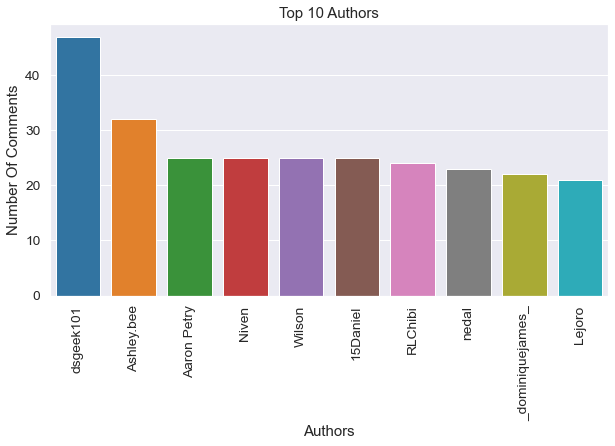

In [8]:
# and graphed... for fun

sns.set_style(style='darkgrid')
sns.set_context('notebook', font_scale=1.25, rc={'lines.linewidth': 2.5})

plt.figure(figsize=(10,5))

ax = sns.barplot(top10.index, top10.values)

labels = ax.set(title='Top 10 Authors',xlabel='Authors', ylabel='Number Of Comments')
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # if not assigned to a variable, then prints lots of text

Here we do not want any content from the bot. This gives us random content to look peruse.

In [20]:
content = [_.lower() for _ in df_prog[df_prog['author.isBot']==False]['content']]

import random

random.choices(content, k=30)

AttributeError: 'list' object has no attribute 'replace'

## Lemmaizing, removing stops words and analysing

In [10]:
# some examples to pick
text1 = 'day 14: went through the first 3 lessons of the deep learning kaggle micro course'
text2 = "day 14: completed kaggle's pandas micro-course"
text3 = '''day 1:  complete the "analyzing police activity with pandas" course on datacamp.'''

#displacy.render(doc, jupyter=True)

for i in random.sample(list(range(len(content))), k=10):
    doc = nlp(content[i])
    noun_list = [token.lemma_ for token in doc if
                not token.is_stop and
                token.pos_ != 'PUNCT']
    output = ' '.join(noun_list)
    print(output)

day 14 66daysofdata
day 6 yesterday machine learn pyspark
yesterday day 3 
 spend time day 😢 finish half datum camp data manipulation pandas course thing stick voluntarily spend time job d
day 14 read practical statistic datum scientist
day 7 learn basic python itertool module complete data analyst quest qwiklab
numpy pandas
day3 complete topic covariance correlation cover r square p value check basic matplotlib
> 
 > day 8 : complete task 1 virtual internship complete week 5 image video processing course 
 @night_fury actual internship company kind bootcamp
> day 10 
 > 
 > get familiar environment anaconda explore jupyter notebook vs code feature 
 > 
 > total 30min 
 > 
 > stay consistent stay encouraged -PRON- 
 > 🤙 🔥 🤘 
 _ 
 check ipynb feature vs code v 1.48.0
@helloworld1234 iitm offer b.sc data science course enroll application open


In [11]:
# day matcher

from spacy.matcher import Matcher

pattern_day = [{'LOWER': 'day'},
              {'LIKE_NUM': True}]

matcher = Matcher(nlp.vocab, validate=True)
matcher.add("DayMatcher", None, pattern_day)

days = []
# for i in range(len(content)):
#     doc = nlp(content[i])
#     days.extend([doc[match[1]:match[2]] for match in matcher(doc)])
# len(days)

In [12]:
df_days = pd.DataFrame(days, columns=['test','days'])
df_days['days'].value_counts() # not working, all digits are unique

Series([], Name: days, dtype: int64)

In [23]:
words = ' '.join(content)
doc = nlp(words)

simplewords = [token.lemma_ for token in doc
                            if not token.is_stop and 
                            not token.is_punct and
                            not token.lemma_ == '\n']

In [24]:
df_sw = pd.DataFrame(simplewords, columns=['word'])
df_sw.value_counts().head()

word  
day       1436
course     533
datum      415
learn      402
python     391
dtype: int64

In [26]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 15))
    plt.imshow(wordcloud)
    plt.axis('off')

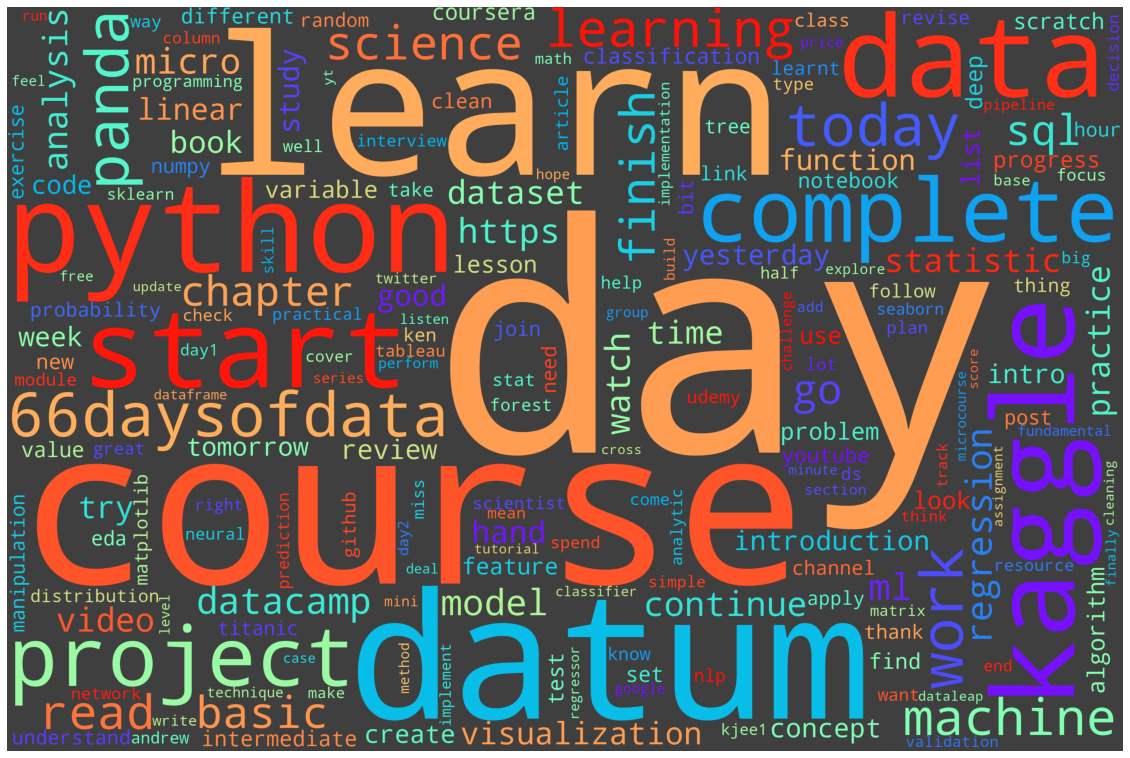

In [40]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 3000, height = 2000,
                      random_state=1, background_color='#3F3F3F',
                      colormap='rainbow', collocations=False,
                      stopwords = STOPWORDS).generate(' '.join(simplewords))

plot_cloud(wordcloud)

## Exploratory Data Analysis - #introductions channel

Find locations and what people do, maybe age as well. Build demographics of the audience

In [15]:
df_intro.shape

(606, 15)

In [16]:
content_intro = [_ for _ in df_intro[df_intro['author.isBot']==False]['content']]

import random

random.choices(content_intro, k=10)

['Hey guys! I am Stefan and I am from Romania. I have stumbled upon the field of Data Science during my 3rd year at the university and I thought it was worth learning some more of it.',
 'Hi guys!! My name is Harsh Banka. I am currently a 12th grade student in India and I am very excited to learn something new about data science and machine learning on this platform. #introductions',
 '@KrombopulosMichael I agree with you',
 '*sure',
 'Hey guys I am a UG CS student in his 2nd year I hope to make a great project to improve my python and for a strong resume',
 'Hello guys,  I am Ignat. I am currently  working as Data Analyst in Research company in Australia. At the moment, my role is more about Data preparation. I would like to keep learning Data Science so I can work on Data Analysis more.\nI have some Stats background , but need to catch up on various programming languages like Python, SQL and R. Also looking forward to work on visualization skills.\nNice to meet you all!',
 'Hello eve

In [17]:
df.

SyntaxError: invalid syntax (<ipython-input-17-38e9e33c87a8>, line 1)